# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


/Users/nikhilramchandani/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data
    X_train_centered = X_train - np.mean(X_train, axis=0)
    X_test_centered = X_test - np.mean(X_train, axis=0)  # Center test data using train mean

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_train_centered, rowvar=False)

    # Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components
    W = eigenvectors[:, :n_components]

    # Project the data onto the new subspace
    X_train_svd = np.dot(X_train_centered, W)
    X_test_svd = np.dot(X_test_centered, W)

    return X_train_svd, X_test_svd, W

## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [9]:
results = []

In [10]:
svd_components = [2,10,50,100,300]  # You need to decide what number to search...

# Store the results

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...

    X_train_svd, X_test_svd, W = apply_svd_custom(X_train, X_test, n_components)

    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 2 components...
SVD components: 2, Accuracy: 0.4484, Training time: 0.2784 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 0.5429 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 5.9270 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 19.6345 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 83.2285 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


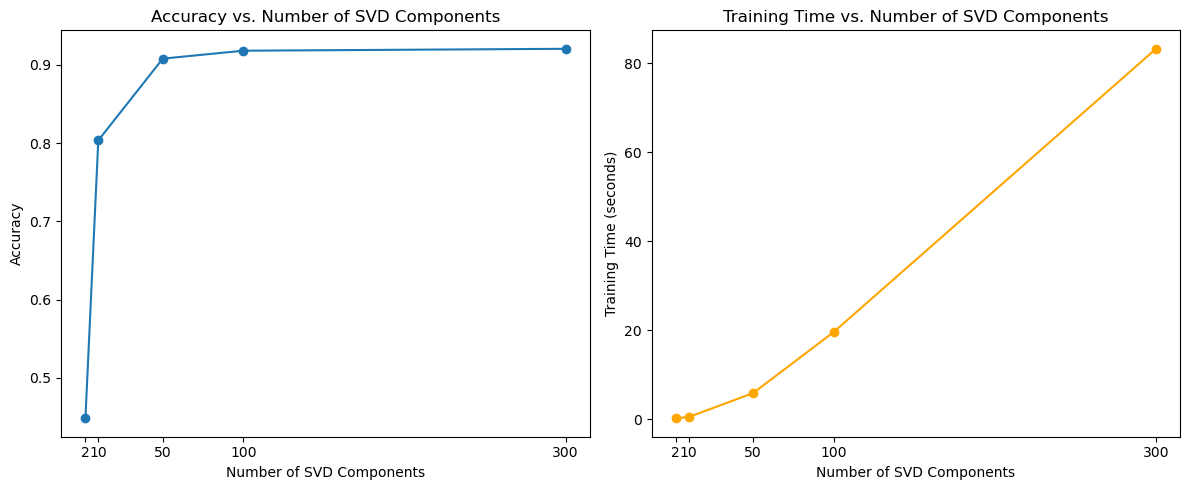

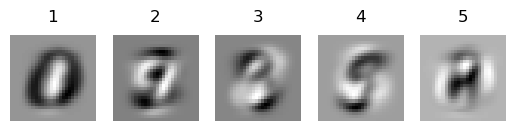

In [14]:
# ... existing code ...

# Part 5: Visualize and Analyze the Results
import matplotlib.pyplot as plt

# Extract results for plotting
components, accuracies, training_times = zip(*results)

# Plot accuracy vs. number of SVD components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.xticks(components)

# Plot training time vs. number of SVD components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.xticks(components)

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors
top_singular_vectors = W[:, :5]  # Get top 5 singular vectors
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_singular_vectors[:, i].reshape(28, 28), cmap='gray')
    plt.title(f'{i + 1}', pad=10)
    plt.axis('off')

plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In conclusion, increasing the number of SVD components generally enhances model accuracy but may lead to diminishing returns in performance. The analysis of the top 5 singular vectors reveals distinct patterns, showcasing the most significant features of the MNIST dataset. This visualization aids in understanding the underlying structure of the data and the effectiveness of dimensionality reduction.